In [25]:
import experiments.weather.data as wd

[Compute environment] paths: 
[Paths] checkpoints: checkpoints (/home/herden/projects/equivariant-posteriors/checkpoints)
[Paths] locks: locks (/home/herden/projects/equivariant-posteriors/locks)
[Paths] distributed_requests: distributed_requests (/home/herden/projects/equivariant-posteriors/distributed_requests)
[Paths] artifacts: artifacts (/home/herden/projects/equivariant-posteriors/artifacts)
[Paths] datasets: datasets (/home/herden/projects/equivariant-posteriors/datasets)
[Compute environment] postgres_host: localhost
[Compute environment] postgres_port: 5430
[Compute environment] postgres_password: herdeherde


In [38]:
import seaborn as sns
import pandas as pd
import duckdb as db

In [40]:
db.sql("ATTACH 'dbname=equiv_v2 user=postgres password=herdeherde host=127.0.0.1 port=5430' as pg (TYPE POSTGRES, READ_ONLY)")

In [50]:
data = db.sql("""
    select 
        *, step / (365*10) as epoch 
    from 
        pg.checkpoint_sample_metric_float as t1 
    join 
        pg.model_parameter_text as t2 
    on t1.model_id=t2.model_id 
    where 
        t2.name='train_config.model.name' 
    order by value, step
    """).df()

In [51]:
data[:1]

,model_id,step,name,dataset,sample_ids,mean,value_per_sample,created_at,id_serial,model_id_1,name_1,value,created_at_1,id_serial_1,epoch
0,1584864244256282559,80340,rmse_surface_u10,era5_2019_2019,[],1.070948,[],2025-03-25 19:17:53.325751,27,1584864244256282559,train_config.model.name,Pangu,2025-03-25 09:36:05.210,1231,22.010959


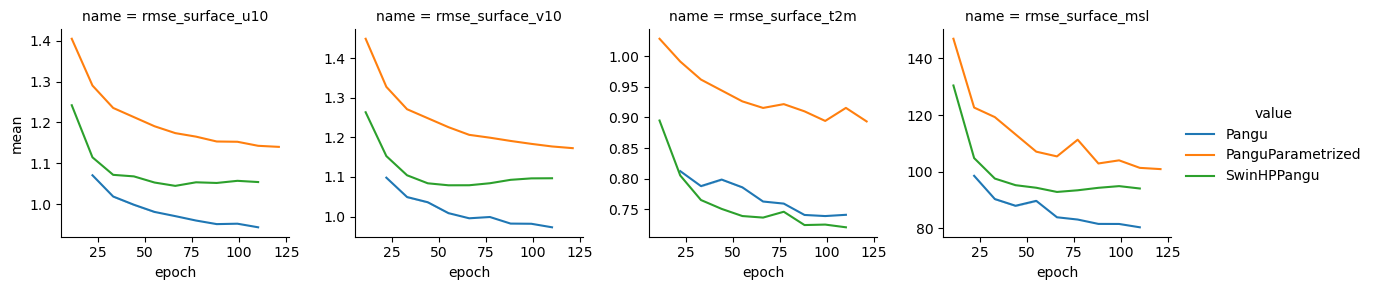

In [52]:
g = sns.FacetGrid(data, col="name", hue="value", sharey=False)
g.map(sns.lineplot, "epoch", "mean")
g.add_legend()

In [47]:
ds_dh = wd.DataHP(wd.DataHPConfig(nside=64, driscoll_healy=True))

Driscoll-Healy resolution for `nside=64`

In [48]:
ds_dh.dh_resolution()

{'lat': 157, 'lon': 314}

As fraction of HP pixels

In [49]:
import math
n_dh_pixels = math.prod(ds_dh.dh_resolution().values())
n_dh_pixels / (12 * 64**2)

1.0029703776041667